# Введение в анализ текстовых данных


## Структура семинара
0. Теоретическая часть
1. Предобработка:
  * нормализация (приведение к одному регистру, удаление пунктуации, исправление опечаток и т. д.)
  * токенизация
    * split
    * токенизаторы nltk (RegexpTokenizer, word_tokenize, ToktokTokenizer, TweetTokenizer)
    * сегментация предложений
  * удаление стоп-слов
  * лемматизация
  * частеречная разметка
  * стемминг
2. Извлечение признаков из текста:
  * мешок слов
  * n-граммы
  * частота встречаемости (TF, CountVectorizer)
  * обратная частота встречаемости (TF-IDF, TfidfVectorizer)
3. Выделение устойчивых словосочетаний (Phrases)
4. Векторизация и обучение модели:
  * word2vec
5. Использование предобученных моделей:
  * word2vec
6. Визуализация "Облако слов"
7. Порождающий ИИ
8. Домашнее задание

## Основные техники 
* Уровень символов:
    * Токенизация: разбиение текста на слова
    * Разбиение текста на предложения
* Уровень слов – морфология:
    * Разметка частей речи
    * Снятие морфологической неоднозначности
    * Нормализация (стемминг или лемматизация)
* Уровень предложений – синтаксис:
    * Выделенние именных или глагольных групп 
    * Выделенние семантических ролей
    * Деревья составляющих и зависимостей
* Уровень смысла – семантика и дискурс:
    * Разрешение кореферентных связей
    * Выделение синонимов
    * Анализ аргументативных связей

## Основные проблемы
* Неоднозначность
    * Лексическая неоднозначность: *орган, парить, рожки, атлас*
    * Морфологическая неоднозначность: *Хранение денег в банке. Что делают белки в клетке?*
    * Синтаксическая неоднозначность: *Мужу изменять нельзя. Его удивил простой солдат. Эти типы стали есть в цехе.*
* Неологизмы: *печеньки, заинстаграммить, репостнуть, расшарить, биткоины*
* Разные варианты написания: *Россия, Российская Федерация, РФ*
* Нестандартное написание (в т.ч. орфографические ошибки и опечатки): *каг дила? куптиь телфон*

### NLP-библиотеки

NLP-библиотеки для питона:
* Natural Language Toolkit (NLTK)
* Apache OpenNLP
* Stanford NLP suite
* Gate NLP library
* Spacy
* Yargy
* DeepPavlov
* CLTK (для древних языков)
* и т.д.

Самая старая и известная — NLTK. В NLTK есть не только различные инструменты для обработки текста, но и данные — текстовые корпуса, предобученные модели для анализа тональности и морфологической разметки, списки стоп-слов для разных языков и т.п.

* [Учебник по NLTK](https://www.nltk.org/book/) от авторов библиотеки и [тьюториалы](https://github.com/hb20007/hands-on-nltk-tutorial) по решению разных задач NLP с помощью NLTK.
* [Документация Spacy](https://spacy.io/)
* [Документация Yargy](https://yargy.readthedocs.io/)
* [Документация DeepPavlop](http://docs.deeppavlov.ai/)

# Общий пайплайн построения текстовых моделей
![](https://drive.google.com/uc?export=view&id=1p8tag03npKfUTUKDMYzkSQaYk06FTZpu)

# Предобработка текста

## Загрузим датасет с новостями

In [1]:
!wget https://github.com/natasha/corus/raw/master/data/ria.json.gz

--2023-05-02 11:16:45--  https://github.com/natasha/corus/raw/master/data/ria.json.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/natasha/corus/master/data/ria.json.gz [following]
--2023-05-02 11:16:45--  https://raw.githubusercontent.com/natasha/corus/master/data/ria.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13768 (13K) [application/octet-stream]
Saving to: ‘ria.json.gz’

ria.json.gz         100%[===================>]  13.45K  --.-KB/s    in 0s      

2023-05-02 11:16:46 (33.7 MB/s) - ‘ria.json.gz’ saved [13768/13768]



In [2]:
!gzip -d ria.json.gz

## Импорт библиотек

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from pprint import pprint

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 100)

## Загружаем данные в датафрейм

In [10]:
df = pd.read_json('ria.json', lines=True)
df

,text,title
0,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> большая часть из 33 ...","большинство детей, которых пытались увезти в сша из гаити, не сироты"
1,"<p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости, марина шмаюн.</strong> премьер-...","луценко будет работать в команде тимошенко, если она победит в выборах"
2,"<p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости.</strong> до <a href=""http://www...","""лютые"" выборы: есть ли вероятность второго майдана?"
3,"<p><strong></strong></p>\n<p><strong>мехико, 31 янв - риа новости, юрий николаев.</strong> групп...","жертвами бойни на севере мексики стали 13 молодых людей, еще 20 ранены"
4,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> немецкий теннисист м...",немец беррер выиграл теннисный турнир на родине
5,"<p><strong></strong></p>\n<p><strong>сараево, 31 янв - риа новости, юлия петровская.</strong> пе...",переходное торговое соглашение сербии с ес вступает в силу 1 февраля
6,"<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...",генсек оон уверен в успехе мирных переговоров на кипре
7,"<p><strong>москва, 31 янв &ndash; риа новости. </strong>леверкузенский ""байер"" со счетом 3:1 на ...","""байер"" вернулся в лидеры чемпионата германии по футболу"
8,"<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...","генсек оон прибыл на кипр, чтобы помочь мирным переговорам"
9,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> пожарным удалось лик...",ликвидирован пожар в гаражном кооперативе на западе москвы


Возьмём текст какой-нибудь одной новости, пусть будет последней:

In [5]:
text = df.iloc[-1, 0]
text

'<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> пожарным удалось ликвидировать возгорание, произошедшее в воскресенье вечером в гаражном кооперативе "матвеевское" на западе москвы, пострадавших нет, сообщил риа новости начальник пресс-службы столичного мчс евгений бобылев.</p>\n<p>по его словам, возгорание гаражей произошло по адресу улица лобачевского, 126.</p>\n<p>ранее сообщалось, что <a href="http://www.rian.ru/moscow/20100131/207111167.html" target="_blank">гаражи горели по адресу улица матвеевская, 42</a>.</p>\n<p>"пожар ликвидирован, пострадали семь гаражей, в которых сгорели пять машин. из сгоревших боксов пожарные эвакуировали шесть газовых баллонов", - сказал бобылев.</p>\n<p>в настоящее время причины возгорания устанавливаются.</p>'

### Приведение к одному регистру

In [11]:
text_lower = "".join([symb.lower() for symb in text])
text_lower

'<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> пожарным удалось ликвидировать возгорание, произошедшее в воскресенье вечером в гаражном кооперативе "матвеевское" на западе москвы, пострадавших нет, сообщил риа новости начальник пресс-службы столичного мчс евгений бобылев.</p>\n<p>по его словам, возгорание гаражей произошло по адресу улица лобачевского, 126.</p>\n<p>ранее сообщалось, что <a href="http://www.rian.ru/moscow/20100131/207111167.html" target="_blank">гаражи горели по адресу улица матвеевская, 42</a>.</p>\n<p>"пожар ликвидирован, пострадали семь гаражей, в которых сгорели пять машин. из сгоревших боксов пожарные эвакуировали шесть газовых баллонов", - сказал бобылев.</p>\n<p>в настоящее время причины возгорания устанавливаются.</p>'

### Исправление опечаток
В поисковых запросах русскоязычного пользователя можно выделить четыре основные группы ошибок только для контекстно-независимого исправления [[1]](https://www.dialog-21.ru/media/1276/paninamf.pdf):
1. ошибки в самих словах (пмрвет → привет), к этой категории относятся всевозможные пропуски, вставки и перестановки букв – 63,7%,
2. слитно-раздельное написание слов – 16,9%,
3. искаженная раскладка (ghbdtn → привет) – 9,7 %,
4. транслитерация (privet → привет) – 1,3%,
5. смешанные ошибки – 8,3%.

В общем виде механизм исправления опечаток основывается на двух моделях: *модель ошибок* и *языковая модель*. Причем для контекстно-независимого исправления используется только модель ошибок, а в контекстно-зависимом – сразу две.

В качестве модели ошибок обычно выступает либо редакционное расстояние (расстояние Левенштейна, Дамерау-Левенштейна, также сюда могут добавляться различные весовые коэффициенты, методы на подобие Soundex и т. д. – в таком случае расстояние называется взвешенным), либо модель Бриля-Мура, которая работает на вероятностях переходов одной строки в другую. [[2]](https://3-info.ru/post/1038)

In [1]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=2b4d7cb61f8eace7db3549d008313c758db99d904d4864dd74e1959044c8a996
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [4]:
from autocorrect import Speller
spell = Speller('ru')
spell('пмрвет'), spell('пмривет'), spell('СУБД'), spell('субд')

('порвет', 'привет', 'СУБД', 'суд')

## Токенизация

#### Сколько слов в этом предложении?

*На дворе трава, на траве дрова, не руби дрова на траве двора.*

* 12 токенов: На, дворе, трава, на, траве, дрова, не, руби, дрова, на, траве, двора
* 8 - 9 словоформ: Н/на, дворе, трава, траве, дрова, не, руби, двора. 
* 6  лексем: на, не, двор, трава, дрова, рубить


### Токен и словоформа

**Словоформа**  – уникальное слово из текста

**Токен**  – словоформа и её позиция в тексте

Объем корпуса измеряется в токенах, объем словаря — в словоформах или лексемах.

### Обозначения 
$N$ = число токенов

$V$ = словарь (все словоформы)

$|V|$ = количество словоформ в словаре

### Токен ≠ слово

### Split

In [ ]:
tokens = text.split()
pprint(tokens)
len(tokens)

['<p><strong></strong></p>',
 '<p><strong>москва,',
 '31',
 'янв',
 '-',
 'риа',
 'новости.</strong>',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание,',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 '"матвеевское"',
 'на',
 'западе',
 'москвы,',
 'пострадавших',
 'нет,',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс-службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев.</p>',
 '<p>по',
 'его',
 'словам,',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского,',
 '126.</p>',
 '<p>ранее',
 'сообщалось,',
 'что',
 '<a',
 'href="http://www.rian.ru/moscow/20100131/207111167.html"',
 'target="_blank">гаражи',
 'горели',
 'по',
 'адресу',
 'улица',
 'матвеевская,',
 '42</a>.</p>',
 '<p>"пожар',
 'ликвидирован,',
 'пострадали',
 'семь',
 'гаражей,',
 'в',
 'которых',
 'сгорели',
 'пять',
 'машин.',
 'из',
 'сгоревших',
 'боксов',
 'пожарные',
 'эвакуировали',
 'шесть',
 'газовых',
 'баллонов",',
 '-',
 'ска

83

### [Токенизаторы NLTK](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize)

In [ ]:
# !pip install --user nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
pprint(tokens)
len(tokens)

['<',
 'p',
 '>',
 '<',
 'strong',
 '>',
 '<',
 '/strong',
 '>',
 '<',
 '/p',
 '>',
 '<',
 'p',
 '>',
 '<',
 'strong',
 '>',
 'москва',
 ',',
 '31',
 'янв',
 '-',
 'риа',
 'новости.',
 '<',
 '/strong',
 '>',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 ',',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 '``',
 'матвеевское',
 "''",
 'на',
 'западе',
 'москвы',
 ',',
 'пострадавших',
 'нет',
 ',',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс-службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев.',
 '<',
 '/p',
 '>',
 '<',
 'p',
 '>',
 'по',
 'его',
 'словам',
 ',',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского',
 ',',
 '126.',
 '<',
 '/p',
 '>',
 '<',
 'p',
 '>',
 'ранее',
 'сообщалось',
 ',',
 'что',
 '<',
 'a',
 'href=',
 "''",
 'http',
 ':',
 '//www.rian.ru/moscow/20100131/207111167.html',
 "''",
 'target=',
 "''",
 '_blank',
 "''",
 '>',
 'гаражи',
 'горели',
 'по',
 'адресу',
 'улиц

161

In [ ]:
from nltk.tokenize import ToktokTokenizer

tokenizer = ToktokTokenizer()
tokens = tokenizer.tokenize(text)
pprint(tokens)
len(tokens)

['<p><strong></strong></p>',
 '<p><strong>москва',
 ',',
 '31',
 'янв',
 '-',
 'риа',
 'новости.</strong>',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 ',',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 '"',
 'матвеевское',
 '"',
 'на',
 'западе',
 'москвы',
 ',',
 'пострадавших',
 'нет',
 ',',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс-службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев.</p>',
 '<p>по',
 'его',
 'словам',
 ',',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского',
 ',',
 '126.</p>',
 '<p>ранее',
 'сообщалось',
 ',',
 'что',
 '<a',
 'href=',
 '"',
 'http://www.rian.ru/moscow/20100131/207111167.html',
 '"',
 'target=',
 '"',
 '_blank',
 '"',
 '>гаражи',
 'горели',
 'по',
 'адресу',
 'улица',
 'матвеевская',
 ',',
 '42</a>.</p>',
 '<p>',
 '"',
 'пожар',
 'ликвидирован',
 ',',
 'пострадали',
 'семь',
 'гаражей',
 ',',
 'в',
 'которых',
 'сгорели',
 'пять',
 'машин.',
 'из'

106

In [12]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[а-я]+')
regexp_tokens = tokenizer.tokenize(text_lower)
pprint(regexp_tokens)
len(regexp_tokens)

['москва',
 'янв',
 'риа',
 'новости',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 'матвеевское',
 'на',
 'западе',
 'москвы',
 'пострадавших',
 'нет',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс',
 'службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев',
 'по',
 'его',
 'словам',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского',
 'ранее',
 'сообщалось',
 'что',
 'гаражи',
 'горели',
 'по',
 'адресу',
 'улица',
 'матвеевская',
 'пожар',
 'ликвидирован',
 'пострадали',
 'семь',
 'гаражей',
 'в',
 'которых',
 'сгорели',
 'пять',
 'машин',
 'из',
 'сгоревших',
 'боксов',
 'пожарные',
 'эвакуировали',
 'шесть',
 'газовых',
 'баллонов',
 'сказал',
 'бобылев',
 'в',
 'настоящее',
 'время',
 'причины',
 'возгорания',
 'устанавливаются']


76

В NLTK довольно много токенизаторов:

In [ ]:
from nltk import tokenize
from pprint import pprint

pprint(dir(tokenize))
len(dir(tokenize))

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer',
 'TreebankWordTokenizer',
 'TweetTokenizer',
 'WhitespaceTokenizer',
 'WordPunctTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_treebank_word_tokenizer',
 'api',
 'blankline_tokenize',
 'casual',
 'casual_tokenize',
 'destructive',
 'legality_principle',
 'line_tokenize',
 'load',
 'mwe',
 'punkt',
 're',
 'regexp',
 'regexp_span_tokenize',
 'regexp_tokenize',
 'repp',
 'sent_tokenize',
 'sexpr',
 'sexpr_tokenize',
 'simple',
 'sonority_sequencing',
 'stanford_segmenter',
 'string_span_tokenize',
 'texttiling',
 'toktok',
 'treebank',
 'util',
 'word_tok

58

Удалим HTML-теги из текста:

In [ ]:
import re
def remove_tag(text):   
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

text = remove_tag(text_lower.split())
text

' москва, 31 янв - риа новости. пожарным удалось ликвидировать возгорание, произошедшее в воскресенье вечером в гаражном кооперативе "матвеевское" на западе москвы, пострадавших нет, сообщил риа новости начальник пресс-службы столичного мчс евгений бобылев. по его словам, возгорание гаражей произошло по адресу улица лобачевского, 126. ранее сообщалось, что гаражи горели по адресу улица матвеевская, 42. "пожар ликвидирован, пострадали семь гаражей, в которых сгорели пять машин. из сгоревших боксов пожарные эвакуировали шесть газовых баллонов", - сказал бобылев. в настоящее время причины возгорания устанавливаются.'

## Сегментация предложений

Сегментацию предложений иногда называют **сплиттингом**. 

Основные признаки — знаки препинания. "?", "!" как правило однозначны, проблемы возникают с "."  Возможное решение: бинарный классификатор для сегментации предложений. Для каждой точки "." определить, является ли она концом предложения или нет.


In [ ]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(text)
print(len(sents))
sents

6


[' москва, 31 янв - риа новости.',
 'пожарным удалось ликвидировать возгорание, произошедшее в воскресенье вечером в гаражном кооперативе "матвеевское" на западе москвы, пострадавших нет, сообщил риа новости начальник пресс-службы столичного мчс евгений бобылев.',
 'по его словам, возгорание гаражей произошло по адресу улица лобачевского, 126. ранее сообщалось, что гаражи горели по адресу улица матвеевская, 42.',
 '"пожар ликвидирован, пострадали семь гаражей, в которых сгорели пять машин.',
 'из сгоревших боксов пожарные эвакуировали шесть газовых баллонов", - сказал бобылев.',
 'в настоящее время причины возгорания устанавливаются.']

## Удаление стоп-слов

In [ ]:
from nltk.corpus import stopwords

# смотрим, какие языки есть
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
stopwords = stopwords.words('russian')
print(stopwords)

text_nonstopwords = [word for word in regexp_tokens if word not in stopwords]
text_nonstopwords

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

['москва',
 'янв',
 'риа',
 'новости',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 'произошедшее',
 'воскресенье',
 'вечером',
 'гаражном',
 'кооперативе',
 'матвеевское',
 'западе',
 'москвы',
 'пострадавших',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс',
 'службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев',
 'словам',
 'возгорание',
 'гаражей',
 'произошло',
 'адресу',
 'улица',
 'лобачевского',
 'ранее',
 'сообщалось',
 'гаражи',
 'горели',
 'адресу',
 'улица',
 'матвеевская',
 'пожар',
 'ликвидирован',
 'пострадали',
 'семь',
 'гаражей',
 'которых',
 'сгорели',
 'пять',
 'машин',
 'сгоревших',
 'боксов',
 'пожарные',
 'эвакуировали',
 'шесть',
 'газовых',
 'баллонов',
 'сказал',
 'бобылев',
 'настоящее',
 'время',
 'причины',
 'возгорания',
 'устанавливаются']

## Стемминг

**Стемминг** — отсечение от слова окончаний и суффиксов, чтобы оставшаяся часть, называемая stem, была одинаковой для всех грамматических форм слова. Стем необязательно совпадает с морфлогической основой слова. Одинаковый стем может получиться и не у однокоренных слов и наоборот — в этом проблема стемминга. 

* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Самый простой алгоритм, алгоритм Портера, состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.

### Snowball stemmer
Улучшенный вариант стеммера Портера; в отличие от него умеет работать не только с английским текстом.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [ ]:
snowball = SnowballStemmer("russian")

for w in regexp_tokens:
    print("%s: %s" % (w, snowball.stem(w)))

москва: москв
янв: янв
риа: ри
новости: новост
пожарным: пожарн
удалось: уда
ликвидировать: ликвидирова
возгорание: возгоран
произошедшее: произошедш
в: в
воскресенье: воскресен
вечером: вечер
в: в
гаражном: гаражн
кооперативе: кооператив
матвеевское: матвеевск
на: на
западе: запад
москвы: москв
пострадавших: пострада
нет: нет
сообщил: сообщ
риа: ри
новости: новост
начальник: начальник
пресс: пресс
службы: служб
столичного: столичн
мчс: мчс
евгений: евген
бобылев: бобыл
по: по
его: ег
словам: слов
возгорание: возгоран
гаражей: гараж
произошло: произошл
по: по
адресу: адрес
улица: улиц
лобачевского: лобачевск
ранее: ран
сообщалось: сообща
что: что
гаражи: гараж
горели: горел
по: по
адресу: адрес
улица: улиц
матвеевская: матвеевск
пожар: пожар
ликвидирован: ликвидирова
пострадали: пострада
семь: сем
гаражей: гараж
в: в
которых: котор
сгорели: сгорел
пять: пят
машин: машин
из: из
сгоревших: сгоревш
боксов: бокс
пожарные: пожарн
эвакуировали: эвакуирова
шесть: шест
газовых: газов
баллонов:

In [ ]:
import string

print(string.punctuation)
punct = string.punctuation + '—«»'
print(punct)

poem = '''
Мне воробьи сегодня рассказали —
Не знаю, правда ли,— что уж весна идет.
Не верится: вчера еще в снежки играли
И на пруду прозрачный крепок лед.
Чивик-чик-чик! Откуда вы узнали?
Кто о весне, пичужки, вам сказал?
«Полдневный луч нам крылышки ласкал,
Капели первые сегодня прозвучали».
'''

words = [w.strip(punct).lower() for w in word_tokenize(poem)]
words = [w for w in words if w not in stopwords and w != '']

for w in words:
    print("%s: %s" % (w, snowball.stem(w)))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~—«»
воробьи: вороб
сегодня: сегодн
рассказали: рассказа
знаю: зна
правда: правд
весна: весн
идет: идет
верится: вер
вчера: вчер
снежки: снежк
играли: игра
пруду: пруд
прозрачный: прозрачн
крепок: крепок
лед: лед
чивик-чик-чик: чивик-чик-чик
откуда: откуд
узнали: узна
весне: весн
пичужки: пичужк
сказал: сказа
полдневный: полдневн
луч: луч
нам: нам
крылышки: крылышк
ласкал: ласка
капели: капел
первые: перв
сегодня: сегодн
прозвучали: прозвуча


## Частеречная разметка (POS-tagging)
## POS-tagging

**Частеречная разметка**, или **POS-tagging** _(part of speech tagging)_ —  определение части речи и грамматических характеристик слов в тексте (корпусе) с приписыванием им соответствующих тегов.

Для большинства слов возможно несколько разборов (т.е. несколько разных лемм, несколько разных частей речи и т.п.). Теггер генерирует  все варианты, ранжирует их по вероятности и по умолчанию выдает наиболее вероятный. Выбор одного разбора из нескольких называется **снятием омонимии**, или **дизамбигуацией**.

### Наборы тегов

Существует множество наборов грамматических тегов, или тегсетов:
* НКРЯ
* Mystem
* UPenn
* OpenCorpora (его использует pymorphy2)
* Universal Dependencies
* ...

Есть даже [библиотека](https://github.com/kmike/russian-tagsets) для преобразования тегов из одной системы в другую для русского языка, `russian-tagsets`. Но важно помнить, что любое такое преобразование будет с потерями! 

На данный момент стандартом является **Universal Dependencies**. Подробнее про проект можно почитать [вот тут](http://universaldependencies.org/), а про теги — [вот тут](http://universaldependencies.org/u/pos/). Вот список основных (частереных) тегов UD:

* ADJ: adjective
* ADP: adposition
* ADV: adverb
* AUX: auxiliary
* CCONJ: coordinating conjunction
* DET: determiner
* INTJ: interjection
* NOUN: noun
* NUM: numeral
* PART: particle
* PRON: pronoun
* PROPN: proper noun
* PUNCT: punctuation
* SCONJ: subordinating conjunction
* SYM: symbol
* VERB: verb
* X: other

In [ ]:
# как достать части речи: RNC
# https://ruscorpora.ru/page/instruction-morph/
nltk.download('averaged_perceptron_tagger_ru')

for word in regexp_tokens:
  nltk_tuple = nltk.pos_tag([word], lang='rus')[0]
  print(nltk_tuple)

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


('москва', 'NONLEX')
('янв', 'S')
('риа', 'V')
('новости', 'S')
('пожарным', 'A=pl')
('удалось', 'V')
('ликвидировать', 'V')
('возгорание', 'S')
('произошедшее', 'V')
('в', 'PR')
('воскресенье', 'S')
('вечером', 'S')
('в', 'PR')
('гаражном', 'A=n')
('кооперативе', 'S')
('матвеевское', 'A=n')
('на', 'PR')
('западе', 'S')
('москвы', 'S')
('пострадавших', 'V')
('нет', 'PRAEDIC')
('сообщил', 'V')
('риа', 'V')
('новости', 'S')
('начальник', 'S')
('пресс', 'S')
('службы', 'S')
('столичного', 'A=n')
('мчс', 'S')
('евгений', 'A=m')
('бобылев', 'V')
('по', 'PR')
('его', 'S-PRO')
('словам', 'S')
('возгорание', 'S')
('гаражей', 'S')
('произошло', 'V')
('по', 'PR')
('адресу', 'S')
('улица', 'S')
('лобачевского', 'A=n')
('ранее', 'ADV')
('сообщалось', 'V')
('что', 'CONJ')
('гаражи', 'V')
('горели', 'V')
('по', 'PR')
('адресу', 'S')
('улица', 'S')
('матвеевская', 'A=f')
('пожар', 'V')
('ликвидирован', 'V')
('пострадали', 'V')
('семь', 'NUM=nom')
('гаражей', 'S')
('в', 'PR')
('которых', 'A-PRO=pl')
(

In [ ]:
# конвертация RNC в UPOS (https://universaldependencies.org/u/pos/)
import requests

ru_rnc_map = "https://raw.githubusercontent.com/slavpetrov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map"
rnc2upos = {}
r = requests.get(ru_rnc_map, stream=True)
for pair in r.text.split("\n"):
    pair = pair.split()
    if len(pair) > 1:
        rnc2upos[pair[0]] = pair[1]

for word in regexp_tokens:
  nltk_tuple = nltk.pos_tag([word], lang='rus')[0]
  pos = nltk_tuple[1]
  pos = re.sub(r"=[\w]+", "", pos)
  if pos in rnc2upos:
      pos = rnc2upos[pos]  # здесь мы конвертируем тэги
  else:
      pos = "X"  # на случай, если попадется тэг, которого нет в маппинге
  print(nltk_tuple[0] + '_' + pos)

москва_X
янв_NOUN
риа_VERB
новости_NOUN
пожарным_ADJ
удалось_VERB
ликвидировать_VERB
возгорание_NOUN
произошедшее_VERB
в_ADP
воскресенье_NOUN
вечером_NOUN
в_ADP
гаражном_ADJ
кооперативе_NOUN
матвеевское_ADJ
на_ADP
западе_NOUN
москвы_NOUN
пострадавших_VERB
нет_X
сообщил_VERB
риа_VERB
новости_NOUN
начальник_NOUN
пресс_NOUN
службы_NOUN
столичного_ADJ
мчс_NOUN
евгений_ADJ
бобылев_VERB
по_ADP
его_X
словам_NOUN
возгорание_NOUN
гаражей_NOUN
произошло_VERB
по_ADP
адресу_NOUN
улица_NOUN
лобачевского_ADJ
ранее_ADV
сообщалось_VERB
что_SCONJ
гаражи_VERB
горели_VERB
по_ADP
адресу_NOUN
улица_NOUN
матвеевская_ADJ
пожар_VERB
ликвидирован_VERB
пострадали_VERB
семь_NUM
гаражей_NOUN
в_ADP
которых_X
сгорели_VERB
пять_NUM
машин_NOUN
из_ADP
сгоревших_VERB
боксов_NOUN
пожарные_ADJ
эвакуировали_VERB
шесть_NUM
газовых_ADJ
баллонов_NOUN
сказал_VERB
бобылев_VERB
в_ADP
настоящее_ADJ
время_NOUN
причины_NOUN
возгорания_NOUN
устанавливаются_VERB


## Лемматизация
Лемматизация — процесс приведения словоформы к лемме, т.е. нормальной (словарной) форме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

    кошке, кошку, кошкам, кошкой ⟹ кошка
    бежал, бежит, бегу ⟹ бежать
    белому, белым, белыми ⟹ белый

In [ ]:
from pymystem3 import Mystem

m = Mystem()
lemmas = m.lemmatize(poem)
print(lemmas)

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


['\n', 'я', ' ', 'воробей', ' ', 'сегодня', ' ', 'рассказывать', ' —\n', 'не', ' ', 'знать', ', ', 'правда', ' ', 'ли', ',— ', 'что', ' ', 'уж', ' ', 'весна', ' ', 'идти', '.', '\n', 'не', ' ', 'вериться', ': ', 'вчера', ' ', 'еще', ' ', 'в', ' ', 'снежок', ' ', 'играть', '\n', 'и', ' ', 'на', ' ', 'пруд', ' ', 'прозрачный', ' ', 'крепкий', ' ', 'лед', '.', '\n', 'чивик', '-', 'чик', '-', 'чик', '! ', 'откуда', ' ', 'вы', ' ', 'узнавать', '?', '\n', 'кто', ' ', 'о', ' ', 'весна', ', ', 'пичужка', ', ', 'вы', ' ', 'сказать', '?', '\n', '«', 'полдневный', ' ', 'луч', ' ', 'мы', ' ', 'крылышко', ' ', 'ласкать', ',\n', 'капель', ' ', 'первый', ' ', 'сегодня', ' ', 'прозвучать', '»', '.', '\n']


## Морфологический анализ

Задачи морфологического анализа:
* Разбор слова — определение нормальной формы (леммы), основы (стема) и грамматических характеристик слова
* Синтез словоформы — генерация словоформы по заданным грамматическим характеристикам из леммы

Морфологический анализ — не самая сильная сторона NLTK. Для этих задач лучше использовать **pymorphy2 и pymystem3 для русского языка** и, например, **Spacy для европейских**.

### pymystem3

**pymystem3** — это питоновская обертка для морфологичекого анализатора Mystem, сделанного в Яндексе. Его можно скачать отдельно и использовать из консоли. Отдельный плюс Mystem - он умеет разрешать омонимию (выбирает более релевантный вариант разбора слова для данного контекста).

* [Документация Mystem](https://tech.yandex.ru/mystem/doc/index-docpage/)
* [Документация pymystem3](http://pythonhosted.org/pymystem3/)

Инициализируем Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

In [ ]:
# ! pip install --user pymystem3

In [ ]:
from pymystem3 import Mystem

m = Mystem()
parsed = m.analyze(" ".join(regexp_tokens))
parsed

[{'analysis': [{'lex': 'москва', 'wt': 1, 'gr': 'S,гео,жен,неод=им,ед'}],
  'text': 'москва'},
 {'text': ' '},
 {'analysis': [{'lex': 'янва',
    'wt': 1,
    'qual': 'bastard',
    'gr': 'S,жен,неод=род,мн'}],
  'text': 'янв'},
 {'text': ' '},
 {'analysis': [{'lex': 'риа',
    'wt': 1,
    'gr': 'S,ед,сред,неод=(пр|вин|дат|род|твор|им)'}],
  'text': 'риа'},
 {'text': ' '},
 {'analysis': [{'lex': 'новость',
    'wt': 1,
    'gr': 'S,жен,неод=(пр,ед|вин,мн|дат,ед|род,ед|им,мн)'}],
  'text': 'новости'},
 {'text': ' '},
 {'analysis': [{'lex': 'пожарный',
    'wt': 0.3538932736,
    'gr': 'S,муж,од=(дат,мн|твор,ед)'}],
  'text': 'пожарным'},
 {'text': ' '},
 {'analysis': [{'lex': 'удаваться',
    'wt': 1,
    'gr': 'V,нп=прош,ед,изъяв,сред,сов'}],
  'text': 'удалось'},
 {'text': ' '},
 {'analysis': [{'lex': 'ликвидировать',
    'wt': 1,
    'gr': 'V,пе=(инф,несов|инф,сов)'}],
  'text': 'ликвидировать'},
 {'text': ' '},
 {'analysis': [{'lex': 'возгорание',
    'wt': 1,
    'gr': 'S,сред,нео

###  pymorphy2

**pymorphy2** — это полноценный морфологический анализатор, целиком написанный на Python. В отличие от Mystem, он не учитывает контекст, а значит, вопрос разрешения омонимии надо будет решать нам самим (об этом ниже). Он также умеет ставить слова в нужную форму (спрягать и склонять). 

[Документация pymorphy2](https://pymorphy2.readthedocs.io/en/latest/)

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.8 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=5397e0f5bc1641e5962ae9065e0b7f072ff0257485ce90e4bf5c056094b18282
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()
p = morph.parse('стали')
p

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

In [ ]:
first = p[0]  # первый разбор
print('Слово:', first.word)
print('Тэг:', first.tag)
print('Лемма:', first.normal_form)
print('Вероятность:', first.score)

Слово: стали
Тэг: VERB,perf,intr plur,past,indc
Лемма: стать
Вероятность: 0.975342


Из каждого тега можно достать более дробную информацию. Если граммема есть в разборе, то вернется ее значение, если ее нет, то вернется None. [Список граммем](https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html)

In [ ]:
print(first.normalized)        # лемма
print(first.tag.POS)           # Part of Speech, часть речи
print(first.tag.animacy)       # одушевленность
print(first.tag.aspect)        # вид: совершенный или несовершенный
print(first.tag.case)          # падеж
print(first.tag.gender)        # род (мужской, женский, средний)
print(first.tag.involvement)   # включенность говорящего в действие
print(first.tag.mood)          # наклонение (повелительное, изъявительное)
print(first.tag.number)        # число (единственное, множественное)
print(first.tag.person)        # лицо (1, 2, 3)
print(first.tag.tense)         # время (настоящее, прошедшее, будущее)
print(first.tag.transitivity)  # переходность (переходный, непереходный)
print(first.tag.voice)         # залог (действительный, страдательный)

Parse(word='стать', tag=OpencorporaTag('INFN,perf,intr'), normal_form='стать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'стать', 945, 0),))
VERB
None
perf
None
None
None
indc
plur
None
past
intr
None


In [ ]:
print(first.normalized)      
print(first.tag.POS)
print(first.tag.aspect)
print(first.tag.case)

Parse(word='стать', tag=OpencorporaTag('INFN,perf,intr'), normal_form='стать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'стать', 945, 0),))
VERB
perf
None


### mystem vs. pymorphy

1) Оба они могут работать с незнакомыми словами (out-of-vocabulary words, OOV).

2) *Скорость*. Mystem работает невероятно медленно под windows на больших текстах, но очень быстро, если запускать из консоли в linux / mac os.

3) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy2 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту:

In [ ]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


In [ ]:
p = morph.parse('сорока')
p

[Parse(word='сорока', tag=OpencorporaTag('NUMR gent'), normal_form='сорок', score=0.68, methods_stack=((DictionaryAnalyzer(), 'сорока', 2921, 1),)),
 Parse(word='сорока', tag=OpencorporaTag('NOUN,anim,femn sing,nomn'), normal_form='сорока', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 421, 0),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR ablt'), normal_form='сорок', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 2921, 4),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR loct'), normal_form='сорок', score=0.08, methods_stack=((DictionaryAnalyzer(), 'сорока', 2921, 5),)),
 Parse(word='сорока', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='сорока', score=0.04, methods_stack=((DictionaryAnalyzer(), 'сорока', 44, 0),)),
 Parse(word='сорока', tag=OpencorporaTag('NUMR datv'), normal_form='сорок', score=0.04, methods_stack=((DictionaryAnalyzer(), 'сорока', 2921, 2),))]

# Извлечение признаков из текста
Задача очень сложная и решается разными методами. Мы рассмотрим самые базовые признаки

In [ ]:
regexp_tokens

['москва',
 'янв',
 'риа',
 'новости',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 'матвеевское',
 'на',
 'западе',
 'москвы',
 'пострадавших',
 'нет',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс',
 'службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев',
 'по',
 'его',
 'словам',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского',
 'ранее',
 'сообщалось',
 'что',
 'гаражи',
 'горели',
 'по',
 'адресу',
 'улица',
 'матвеевская',
 'пожар',
 'ликвидирован',
 'пострадали',
 'семь',
 'гаражей',
 'в',
 'которых',
 'сгорели',
 'пять',
 'машин',
 'из',
 'сгоревших',
 'боксов',
 'пожарные',
 'эвакуировали',
 'шесть',
 'газовых',
 'баллонов',
 'сказал',
 'бобылев',
 'в',
 'настоящее',
 'время',
 'причины',
 'возгорания',
 'устанавливаются']

# N-граммы

In [ ]:
from nltk import ngrams

list(ngrams(regexp_tokens, 1)) # униграммы

[('москва',),
 ('янв',),
 ('риа',),
 ('новости',),
 ('пожарным',),
 ('удалось',),
 ('ликвидировать',),
 ('возгорание',),
 ('произошедшее',),
 ('в',),
 ('воскресенье',),
 ('вечером',),
 ('в',),
 ('гаражном',),
 ('кооперативе',),
 ('матвеевское',),
 ('на',),
 ('западе',),
 ('москвы',),
 ('пострадавших',),
 ('нет',),
 ('сообщил',),
 ('риа',),
 ('новости',),
 ('начальник',),
 ('пресс',),
 ('службы',),
 ('столичного',),
 ('мчс',),
 ('евгений',),
 ('бобылев',),
 ('по',),
 ('его',),
 ('словам',),
 ('возгорание',),
 ('гаражей',),
 ('произошло',),
 ('по',),
 ('адресу',),
 ('улица',),
 ('лобачевского',),
 ('ранее',),
 ('сообщалось',),
 ('что',),
 ('гаражи',),
 ('горели',),
 ('по',),
 ('адресу',),
 ('улица',),
 ('матвеевская',),
 ('пожар',),
 ('ликвидирован',),
 ('пострадали',),
 ('семь',),
 ('гаражей',),
 ('в',),
 ('которых',),
 ('сгорели',),
 ('пять',),
 ('машин',),
 ('из',),
 ('сгоревших',),
 ('боксов',),
 ('пожарные',),
 ('эвакуировали',),
 ('шесть',),
 ('газовых',),
 ('баллонов',),
 ('сказал

In [ ]:
list(ngrams(regexp_tokens, 2)) # биграммы

[('москва', 'янв'),
 ('янв', 'риа'),
 ('риа', 'новости'),
 ('новости', 'пожарным'),
 ('пожарным', 'удалось'),
 ('удалось', 'ликвидировать'),
 ('ликвидировать', 'возгорание'),
 ('возгорание', 'произошедшее'),
 ('произошедшее', 'в'),
 ('в', 'воскресенье'),
 ('воскресенье', 'вечером'),
 ('вечером', 'в'),
 ('в', 'гаражном'),
 ('гаражном', 'кооперативе'),
 ('кооперативе', 'матвеевское'),
 ('матвеевское', 'на'),
 ('на', 'западе'),
 ('западе', 'москвы'),
 ('москвы', 'пострадавших'),
 ('пострадавших', 'нет'),
 ('нет', 'сообщил'),
 ('сообщил', 'риа'),
 ('риа', 'новости'),
 ('новости', 'начальник'),
 ('начальник', 'пресс'),
 ('пресс', 'службы'),
 ('службы', 'столичного'),
 ('столичного', 'мчс'),
 ('мчс', 'евгений'),
 ('евгений', 'бобылев'),
 ('бобылев', 'по'),
 ('по', 'его'),
 ('его', 'словам'),
 ('словам', 'возгорание'),
 ('возгорание', 'гаражей'),
 ('гаражей', 'произошло'),
 ('произошло', 'по'),
 ('по', 'адресу'),
 ('адресу', 'улица'),
 ('улица', 'лобачевского'),
 ('лобачевского', 'ранее'),
 (

In [ ]:
list(ngrams(regexp_tokens, 3)) # триграммы

[('москва', 'янв', 'риа'),
 ('янв', 'риа', 'новости'),
 ('риа', 'новости', 'пожарным'),
 ('новости', 'пожарным', 'удалось'),
 ('пожарным', 'удалось', 'ликвидировать'),
 ('удалось', 'ликвидировать', 'возгорание'),
 ('ликвидировать', 'возгорание', 'произошедшее'),
 ('возгорание', 'произошедшее', 'в'),
 ('произошедшее', 'в', 'воскресенье'),
 ('в', 'воскресенье', 'вечером'),
 ('воскресенье', 'вечером', 'в'),
 ('вечером', 'в', 'гаражном'),
 ('в', 'гаражном', 'кооперативе'),
 ('гаражном', 'кооперативе', 'матвеевское'),
 ('кооперативе', 'матвеевское', 'на'),
 ('матвеевское', 'на', 'западе'),
 ('на', 'западе', 'москвы'),
 ('западе', 'москвы', 'пострадавших'),
 ('москвы', 'пострадавших', 'нет'),
 ('пострадавших', 'нет', 'сообщил'),
 ('нет', 'сообщил', 'риа'),
 ('сообщил', 'риа', 'новости'),
 ('риа', 'новости', 'начальник'),
 ('новости', 'начальник', 'пресс'),
 ('начальник', 'пресс', 'службы'),
 ('пресс', 'службы', 'столичного'),
 ('службы', 'столичного', 'мчс'),
 ('столичного', 'мчс', 'евгений'

# Мешок слов (bag of words)
Итак, мы хотим преобразовать наши обработанные данные в вектора с помощью мешка слов. Мешок слов можно строить как для отдельных слов (лемм в нашем случае), так и для n-грамм, и это может улучшать качество. 

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ
![](https://qph.fs.quoracdn.net/main-qimg-4934f0958e121d33717f848230ef664a)

In [ ]:
regexp_tokens

['москва',
 'янв',
 'риа',
 'новости',
 'пожарным',
 'удалось',
 'ликвидировать',
 'возгорание',
 'произошедшее',
 'в',
 'воскресенье',
 'вечером',
 'в',
 'гаражном',
 'кооперативе',
 'матвеевское',
 'на',
 'западе',
 'москвы',
 'пострадавших',
 'нет',
 'сообщил',
 'риа',
 'новости',
 'начальник',
 'пресс',
 'службы',
 'столичного',
 'мчс',
 'евгений',
 'бобылев',
 'по',
 'его',
 'словам',
 'возгорание',
 'гаражей',
 'произошло',
 'по',
 'адресу',
 'улица',
 'лобачевского',
 'ранее',
 'сообщалось',
 'что',
 'гаражи',
 'горели',
 'по',
 'адресу',
 'улица',
 'матвеевская',
 'пожар',
 'ликвидирован',
 'пострадали',
 'семь',
 'гаражей',
 'в',
 'которых',
 'сгорели',
 'пять',
 'машин',
 'из',
 'сгоревших',
 'боксов',
 'пожарные',
 'эвакуировали',
 'шесть',
 'газовых',
 'баллонов',
 'сказал',
 'бобылев',
 'в',
 'настоящее',
 'время',
 'причины',
 'возгорания',
 'устанавливаются']

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1, 1)) # строим BoW для слов
bow = vec.fit_transform(regexp_tokens)
bow

<76x63 sparse matrix of type '<class 'numpy.int64'>'
	with 72 stored elements in Compressed Sparse Row format>

ngram_range отвечает за то, какие n-граммы мы используем в качестве признаков:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В vec.vocabulary_ лежит словарь: соответствие слов и их индексов в словаре:

In [ ]:
list(vec.vocabulary_.items())

[('москва', 26),
 ('янв', 62),
 ('риа', 46),
 ('новости', 33),
 ('пожарным', 37),
 ('удалось', 56),
 ('ликвидировать', 21),
 ('возгорание', 5),
 ('произошедшее', 42),
 ('воскресенье', 7),
 ('вечером', 4),
 ('гаражном', 12),
 ('кооперативе', 18),
 ('матвеевское', 24),
 ('на', 29),
 ('западе', 16),
 ('москвы', 27),
 ('пострадавших', 38),
 ('нет', 32),
 ('сообщил', 54),
 ('начальник', 31),
 ('пресс', 40),
 ('службы', 52),
 ('столичного', 55),
 ('мчс', 28),
 ('евгений', 14),
 ('бобылев', 2),
 ('по', 34),
 ('его', 15),
 ('словам', 51),
 ('гаражей', 10),
 ('произошло', 43),
 ('адресу', 0),
 ('улица', 57),
 ('лобачевского', 22),
 ('ранее', 45),
 ('сообщалось', 53),
 ('что', 59),
 ('гаражи', 11),
 ('горели', 13),
 ('матвеевская', 23),
 ('пожар', 35),
 ('ликвидирован', 20),
 ('пострадали', 39),
 ('семь', 49),
 ('которых', 19),
 ('сгорели', 48),
 ('пять', 44),
 ('машин', 25),
 ('из', 17),
 ('сгоревших', 47),
 ('боксов', 3),
 ('пожарные', 36),
 ('эвакуировали', 61),
 ('шесть', 60),
 ('газовых', 9

In [ ]:
bow[0]

<1x63 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

Теперь у нас есть вектора, на которых можно обучать модели! Правда, на одном предложении обучать модель нет смысла, так что придётся провернуть всю эту логику для всех новостей:
1. Предобработка текстов
2. Построение мешка слов с помощью CountVectorizer

## TfidfVectorizer

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- слово (term), `d` -- документ, $n_t$ -- количество вхождений слова, $n_k$ -- количество вхождений остальных слов

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

`t` -- слово (term), `D` -- коллекция документов

Перемножаем их:
$$TFIDF(t,d,D) = TF(t,d) \times IDF(i, D)$$

Ключевая идея этого подхода – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

Пример:
```
мастер_по_кондиционерам = ['холодильный', 'установка', 'кондиционер', 'воздух', 'ремонт']
мастер_по_холодильникам = ['холодильный', 'установка', 'холодильник', 'ремонт']
инженер_холодильного_оборудования = ['холодильный', 'установка', 'схема', 'разработка']
```

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_texts = ["".join([symb.lower() for symb in text]) for text in df['text']]
all_tokens = [tokenizer.tokenize(text) for text in all_texts]
all_texts_preproc = [" ".join(tokens) for tokens in all_tokens]
fidf = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords.words('russian'))
bow = tfidf.fit_transform(all_texts_preproc)
list(tfidf.vocabulary_.items())  # токен, индекс

[('москва', 674),
 ('янв', 1618),
 ('риа', 1181),
 ('новости', 757),
 ('большая', 64),
 ('часть', 1555),
 ('из', 447),
 ('детей', 321),
 ('которых', 552),
 ('граждане', 273),
 ('сша', 1397),
 ('пытались', 1124),
 ('вывезти', 199),
 ('гаити', 216),
 ('организованный', 818),
 ('доминиканской', 348),
 ('республике', 1172),
 ('приют', 1080),
 ('не', 727),
 ('являются', 1617),
 ('сиротами', 1254),
 ('сообщает', 1311),
 ('воскресенье', 161),
 ('агентство', 2),
 ('франс', 1527),
 ('пресс', 1050),
 ('со', 1289),
 ('ссылкой', 1341),
 ('на', 686),
 ('заявление', 434),
 ('представителя', 1035),
 ('международной', 620),
 ('организации', 817),
 ('детские', 323),
 ('деревни', 318),
 ('оказывающей', 797),
 ('помощь', 986),
 ('детям', 326),
 ('оставшимся', 827),
 ('без', 37),
 ('родителей', 1186),
 ('как', 487),
 ('заявила', 432),
 ('агентству', 3),
 ('патрисия', 887),
 ('варгас', 100),
 ('курирующая', 563),
 ('программы', 1097),
 ('детских', 324),
 ('деревень', 317),
 ('центральной', 1546),
 ('америк

In [41]:
bow[0]

<1x1625 sparse matrix of type '<class 'numpy.float64'>'
	with 232 stored elements in Compressed Sparse Row format>

In [42]:
pd.DataFrame(bow.toarray(), columns=tfidf.get_feature_names_out())

автомобилями  автономной  агентство  агентству  агитаторша  агитацией  агитации  агитационная  агитационной  агитировать  агитирующий  административный    адреса    адресу    айдахо  активных     актом  актуальным  александра   алексей       али  американского   америке  аналитики  аналитиков   андреем    апреля  аспектах   аспекты  ассоциации     афины   бавария     байер    байера  баллонов  баптистской  бастианс       без  безопасности   белград  белграда     бело    белого    белым   бельрив  бенгальского    берет    беррер  бескомпромиссной  билбордов  благодарны  благодаря  благосклонности  благотворительном  ближайшие     блок   бобылев      бог  богдановский   боевого       бой   бойкая    боксов     более   большая    больше   большие  большинство  большой  бондаренко  боруссия   борцам    борьбе    борьбу   бразды  браммерц    братья     будет     будут  буквально     букет       бы    бывшей   бывший       был      была      были      было  быстрее   быстро      быть      бют  бютовцев   вадима    важно    важные   важным  вакууме    валко      вам    варгас   вариант  варианта  варианте  вариантов  варианты    вдоль  ведущих    венсан   вернее  вернулся  верующих      верх  вечеринку   вечером  взаимоприемлемое      взял     визит   визитом    виктор  виктором    висит     витя  владимир  владимировне  владимировны   власов   властей    власти    вместе      вне  внедорожниках  внеочередном    внесла  внешнеполитическим  внутренних        во  вовлечена   военным  возглавляющий  возгорание  возгорания  возликовали  возмездия  возможно  возможность  возможны  возникновение   возраст  возраста  возьмет  возьмите      волю    вообще  вооруженные  вооруженных  вопросов   вопросы  ворвалась  ворвались     вором  воскресенье  воскресное  воссоединении  воссоединению   восток  востоке   востоку  восточная   восьми       вот     врачи  времени     время     вряд       все   всегда     всего      всей      всех     всея  вскорости  встретиться  вступает  вступление  вступлению  вторжением   второго    второй    втором  второму        вы     выбор   выборах   выборе   выборов    выборы   выбрать   выведет   вывезти   вывести  выводит     вывоз    вывоза  выглядеть  выиграет  выиграть   выйдут  выражением   выразил   выхода  вышеперечисленных  выяснила     гааге  газетки   газовых     гаити  гаитянская  гаитянские   гамбург   гаражей    гаражи  гаражном  гарантирует       где  генерального  генеральный    генсек  германии  германия        ги  гибкость     глава  главная  главного   главным  главпочтамта     главу     главы  глазами    гласит  глобальных        го  говорить      год      года    годов      году       гол    голос   голоса  голосах   голосов  голосования  голосовать  голубевым      голы    гонке       гоп    горели     город    города    городе   городом  горшенина  госпитализирована  государства  государственное  государственной    готов   готовы  градусов   граждан  граждане  гражданством   границе  графики     греко  грузинские    группа    группы    гузар   гулять       да    давно      дает      даже      дай      дам     даму     дамы   данного   данном   данные    данным     дата     даты       два  двузонального    двумя      двух  двухобщинного        де   девочки   девушек  девушки     дежер  действие  действующий   декабря       дел  делегации      делу     делю  демократическими  депутат  дердийок  деревень   деревни  десятерых    десять     детей      дети   детские   детских    детьми     детям  димитрис  димитрисом  дипломата  директор  директора       для      дней      дня        до   добавил  добавила  добиваться  добиться  договориться   докладе  документ  документы    должен   должно   должны  домашние  доминиканской  доминиканскую     домов      дому  допустить  дорогам  достигнут  достижением      дочь     дошли   другие   других   другой    думали    думаю  духовно  духовное  духовной  духовные   евгений      евро  еврокомиссия  европейская  европейский  европейской  евросоюза  евросоюзом 

"Обучение" на всём корпусе, а получение значения - для конкретного текста относительно всего корпуса

In [45]:
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords.words('russian')).fit(all_texts)

sample = df.iloc[-1, 0]
sample = "".join([symb.lower() for symb in sample])
sample = tokenizer.tokenize(sample)

sample_tfidf = tfidf.transform(sample)
sample_tfidf

<76x1670 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [46]:
def get_tfidf_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.mean(axis=0)).ravel())
    
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    # print("=== sorted_scores: ===")
    # print(sorted_scores)
    
    words = []
    tfidf_scores = []
    for item in sorted_scores:
        words.append(item[0])
        # print(item[0])
        tfidf_scores.append(float(item[1]))
        # print(item[1])
    return words, tfidf_scores

words, tfidf_scores = get_tfidf_scores(tfidf, sample_tfidf)

words_and_tfidf = sorted(list(zip(words, tfidf_scores)), key=lambda pair: pair[1], reverse=True)
words_and_tfidf

[('адресу', 0.02631578947368421),
 ('бобылев', 0.02631578947368421),
 ('возгорание', 0.02631578947368421),
 ('гаражей', 0.02631578947368421),
 ('новости', 0.02631578947368421),
 ('риа', 0.02631578947368421),
 ('улица', 0.02631578947368421),
 ('баллонов', 0.013157894736842105),
 ('боксов', 0.013157894736842105),
 ('вечером', 0.013157894736842105),
 ('возгорания', 0.013157894736842105),
 ('воскресенье', 0.013157894736842105),
 ('время', 0.013157894736842105),
 ('газовых', 0.013157894736842105),
 ('гаражи', 0.013157894736842105),
 ('гаражном', 0.013157894736842105),
 ('горели', 0.013157894736842105),
 ('евгений', 0.013157894736842105),
 ('западе', 0.013157894736842105),
 ('кооперативе', 0.013157894736842105),
 ('которых', 0.013157894736842105),
 ('ликвидирован', 0.013157894736842105),
 ('ликвидировать', 0.013157894736842105),
 ('лобачевского', 0.013157894736842105),
 ('матвеевская', 0.013157894736842105),
 ('матвеевское', 0.013157894736842105),
 ('машин', 0.013157894736842105),
 ('москва'

# Выделение устойчивых словосочетаний (фраз)

In [ ]:
from gensim.models.phrases import Phrases

documents = [
             "Мэр Москвы был там",
             "машинное обучение иногда может быть полезным",
             "присутствовал мэр Москвы",
             "в Москве вспышка болезни",
             "вспышка болезни угрожает стране"
             ]

sentence_stream = [doc.lower().split(" ") for doc in documents]
phrases = Phrases(sentence_stream, min_count=1, threshold=2)
sent = "в Москве прогнозировалась вспышка болезни".lower().split()
print(phrases[sent])
sent = "об этом сообщал мэр Москвы".lower().split()
print(phrases[sent])

['в', 'москве', 'прогнозировалась', 'вспышка_болезни']
['об', 'этом', 'сообщал', 'мэр_москвы']


# Обучение модели [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)
![](https://miro.medium.com/max/530/1*LdviucnshWgIIcQvhTTF-g.png)  
Алгоритмы word2vec используют контекст, чтобы сформировать численные представления слов, поэтому слова, используемые в одном и том же контексте, имеют похожие векторы.  
### Что такое контекст или окно?
Возьмем такой пример:

_The cat pushed the glass off the table._

Нужные нам данные будут получаться так. Каждая скобка обозначает единичное __контекстное окно__. Синее поле обозначает входной one-hot вектор (целевое слово), красное поле — выходной one-hot вектор (любое слово в контекстном окне за исключением целевого слова, так называемое контекстное слово). Из одного контекстного окна получаются два элемента данных (на одно целевое слово приходится два соседних). Размер окна обычно определяется пользователем. Не надо путать целевое слово с целевыми данными, это совершенно разные вещи.  
![](https://neurohive.io/wp-content/uploads/2018/07/dannye-v-word2vec-507x422.png)  
Замечено, что меньшие размеры окон (2−15) порождают взаимозаменяемые вложения с похожими индексами (обратите внимание, что антонимы часто взаимозаменяемы, если смотреть на окружающие слова: например, слова «хорошо» и «плохо» часто упоминаются в схожих контекстах). Большие размеры окон (15−50 или даже больше) порождают родственные вложения со схожими индексами.  
![](https://habrastorage.org/r/w1560/getpro/habr/post_images/9fe/437/447/9fe4374479f547c1b324c7471cd61cbd.png)  
[Рекомендательная система постов в Instagram использует Word2Vec](https://neurohive.io/ru/novosti/kak-ustroena-rekomendatelnaya-sistema-postov-v-instagram/)

In [ ]:
from gensim.test.utils import common_texts

common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
phrases = Phrases(common_texts, min_count=1, threshold=2)
for sent in phrases[common_texts]:
    print(sent)

['human', 'interface', 'computer']
['survey', 'user', 'computer', 'system', 'response_time']
['eps', 'user', 'interface', 'system']
['system', 'human', 'system', 'eps']
['user', 'response_time']
['trees']
['graph', 'trees']
['graph_minors', 'trees']
['graph_minors', 'survey']


Обучаем модель

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(phrases[common_texts], window=2, min_count=1)
# если обучать не на фразах:
# model = Word2Vec(common_texts, window=2, min_count=1)
print(len(model.wv.vectors))

11


In [ ]:
vector = model.wv['computer']
print(vector)

[ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-03 -5.3580985e-03  9.3165627e-03
 -8.9737261e-03  3.8259076e-03  6.6544057e-04  6.6607012e-03
  8.3127534e-03 -2.8507852e-03 -3.9923131e-03  8.8979173e-03
  2.0896459e-03  6.24894

In [ ]:
help(model)

Help on Word2Vec in module gensim.models.word2vec object:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10

In [ ]:
pprint(model.wv.most_similar(positive=['computer']))

[('graph', 0.1088901162147522),
 ('system', 0.09291724115610123),
 ('survey', 0.00484249135479331),
 ('user', -0.0027540253940969706),
 ('graph_minors', -0.013679751195013523),
 ('eps', -0.028491031378507614),
 ('response_time', -0.05774581804871559),
 ('human', -0.09326910227537155),
 ('trees', -0.11555545777082443),
 ('interface', -0.14454567432403564)]


Модель можно сохранить
```python
model.save("word2vec.model")
```
Затем, когда вам понадобится её дообучить, загрузить
```python
model = Word2Vec.load("word2vec.model")
```
и дообучить
```python
model.train([["hello", "world"]], total_examples=1, epochs=1)
```

# Использование предобученных моделей
[RusVectōrēs: семантические модели для русского языка](https://rusvectores.org/ru/models/)

ruscorpora_upos_skipgram_300_5_2018:
```
НКРЯ	250 миллионов слов	195 071	20	Universal Tags	Continuous Skipgram	300
```

In [ ]:
!wget https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz

--2023-04-26 10:40:08--  https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz
Resolving rusvectores.org (rusvectores.org)... 172.104.228.108
Connecting to rusvectores.org (rusvectores.org)|172.104.228.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199864398 (191M) [application/x-gzip]
Saving to: ‘ruscorpora_upos_skipgram_300_5_2018.vec.gz’

ruscorpora_upos_ski 100%[===================>] 190.61M  31.2MB/s    in 7.0s    

2023-04-26 10:40:16 (27.3 MB/s) - ‘ruscorpora_upos_skipgram_300_5_2018.vec.gz’ saved [199864398/199864398]



In [ ]:
!gunzip ruscorpora_upos_skipgram_300_5_2018.vec.gz

In [ ]:
from gensim.models import KeyedVectors

ruscorpora_upos = KeyedVectors.load_word2vec_format('/content/ruscorpora_upos_skipgram_300_5_2018.vec')
ruscorpora_upos

In [ ]:
len(ruscorpora_upos.vectors)

195071

In [ ]:
ruscorpora_upos['стол_NOUN']

array([-3.28180e-02, -9.20640e-02, -2.04220e-02,  1.84100e-02,
       -2.94940e-02,  1.89100e-02, -2.10130e-02,  1.67840e-02,
        4.31460e-02,  3.57020e-02, -8.47700e-03, -3.56560e-02,
        1.75000e-04,  9.94100e-03,  6.15770e-02,  4.39750e-02,
        2.31590e-02, -5.36390e-02, -7.07550e-02, -1.04732e-01,
        6.26940e-02, -5.85480e-02,  5.79050e-02, -8.62900e-03,
       -2.19970e-02, -2.21260e-02,  4.11460e-02, -6.26060e-02,
       -2.46340e-02,  7.94560e-02,  2.19890e-02, -8.06280e-02,
       -5.97010e-02,  5.83000e-02, -3.38090e-02,  4.47020e-02,
       -3.76220e-02,  7.42370e-02,  5.64980e-02,  2.43550e-02,
       -6.16750e-02, -8.02400e-03,  1.30000e-04,  1.03280e-01,
       -4.68400e-03, -6.41680e-02,  6.30470e-02, -4.30380e-02,
        2.00660e-02, -3.70510e-02,  3.67300e-03,  9.97730e-02,
       -8.77440e-02, -9.34000e-03, -5.07100e-03, -1.80100e-03,
       -4.06630e-02,  6.44320e-02, -5.91810e-02, -3.72930e-02,
        9.04300e-02,  7.51700e-03, -4.29130e-02, -2.042

In [ ]:
len(ruscorpora_upos['стол_NOUN'])

300

In [ ]:
ruscorpora_upos.most_similar(positive=['стол_NOUN'])  # можно указать кол-во похожих слов (аттрибут topn: topn=20)

[('столик_NOUN', 0.7797671556472778),
 ('столомтраница_NOUN', 0.6771054267883301),
 ('стул_NOUN', 0.6719151139259338),
 ('скатерть_NOUN', 0.6601302027702332),
 ('табурет_NOUN', 0.6501899361610413),
 ('столетраница_NOUN', 0.6488069295883179),
 ('столетраница_VERB', 0.6439605951309204),
 ('ломберный_ADJ', 0.6373644471168518),
 ('диван_NOUN', 0.6358863711357117),
 ('табуретка_NOUN', 0.6312155723571777)]

In [ ]:
ruscorpora_upos.most_similar(negative=['стол_NOUN'])

[('предопределить_VERB', 0.05864405632019043),
 ('преследовать_ADJ', 0.0499335415661335),
 ('живучесть_VERB', 0.048274293541908264),
 ('проходимость_NOUN', 0.044887691736221313),
 ('подверженный_VERB', 0.04193538799881935),
 ('сплав_VERB', 0.039564117789268494),
 ('границ_NOUN', 0.03811388835310936),
 ('перевоплощение_NOUN', 0.036484625190496445),
 ('ралли_NOUN', 0.035202402621507645),
 ('защита_VERB', 0.03400357812643051)]

[Семантический калькулятор от RusVectores](https://rusvectores.org/ru/calculator/#)

In [ ]:
ruscorpora_upos.most_similar(positive=['король_NOUN', 'королева_NOUN'])

[('королева_ADV', 0.7952872514724731),
 ('герцог_NOUN', 0.7521611452102661),
 ('принцесса_NOUN', 0.7369706034660339),
 ('наваррский_ADJ', 0.7211741805076599),
 ('фридерик_PROPN', 0.7178522348403931),
 ('наваррский_PROPN', 0.7164351940155029),
 ('принц_NOUN', 0.7164216041564941),
 ('анна::австрийский_PROPN', 0.7154427170753479),
 ('генрих_PROPN', 0.7089248895645142),
 ('король_PROPN', 0.70688396692276)]

In [ ]:
new_word = ruscorpora_upos['король_NOUN'] + ruscorpora_upos['королева_NOUN']
ruscorpora_upos.most_similar(positive=[new_word])

[('королева_NOUN', 0.9419828653335571),
 ('король_NOUN', 0.9419827461242676),
 ('королева_ADV', 0.7952872514724731),
 ('герцог_NOUN', 0.7521611452102661),
 ('принцесса_NOUN', 0.7369706630706787),
 ('наваррский_ADJ', 0.7211741209030151),
 ('фридерик_PROPN', 0.7178522348403931),
 ('наваррский_PROPN', 0.7164351940155029),
 ('принц_NOUN', 0.7164216041564941),
 ('анна::австрийский_PROPN', 0.7154427170753479)]

In [ ]:
ruscorpora_upos.most_similar(positive=['ключ_NOUN'], negative=['вода_NOUN'])

[('ключик_NOUN', 0.4123572111129761),
 ('отмычка_NOUN', 0.40197497606277466),
 ('ключ_VERB', 0.33758673071861267),
 ('замок_NOUN', 0.33171987533569336),
 ('отпирать_VERB', 0.3096920847892761),
 ('отпереть_VERB', 0.2974616289138794),
 ('отмыкать_VERB', 0.2867138385772705),
 ('сейф_NOUN', 0.28399911522865295),
 ('ключ_PROPN', 0.27951937913894653),
 ('замочный_ADJ', 0.27637097239494324)]

# Красивая визуализация (облако слов)
[Word Cloud](http://amueller.github.io/word_cloud/)

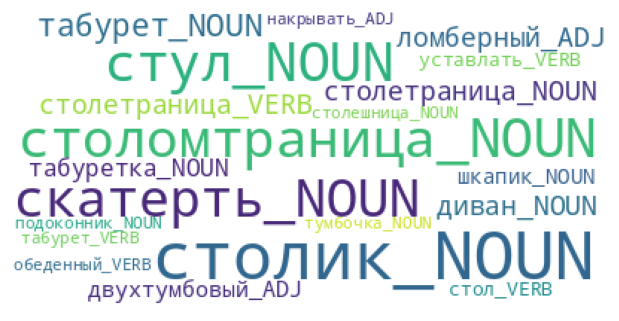

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

similar_words = ruscorpora_upos.most_similar(positive=['стол_NOUN'], topn=20)
similar_words = [tup[0] for tup in similar_words]
similar_words = ' '.join(similar_words)

wc = WordCloud(background_color="white", colormap='viridis')
wc.generate(similar_words)

plt.figure(dpi=120)
plt.axis("off")
plt.imshow(wc)
plt.show()

# Генеративный или порождающий ИИ

Генеративный искусственный интеллект или порождающий ИИ / (GenAI) - это тип системы искусственного интеллекта, способной генерировать текст, изображения или другие носители информации в ответ на подсказки. Генеративные системы искусственного интеллекта используют генеративные модели, такие как большие языковые модели, для получения данных на основе обучающего набора данных, который использовался для их создания.

Генеративный ИИ относится к классу алгоритмов и моделей искусственного интеллекта, которые могут генерировать новый, оригинальный контент, такой как изображения, текст, аудио или видео, а не просто классифицировать или прогнозировать существующие данные. Генеративные модели изучают шаблоны и структуру входных данных, а затем генерируют новый контент, похожий на обучающие данные, но с некоторой степенью новизны.

Один из распространенных подходов к генеративному ИИ заключается в использовании типа нейронной сети, называемой генеративной состязательной сетью (GAN), которая состоит из двух частей:
* сети-генератора, которая создает новые выборки данных,
* сети-дискриминатора, которая оценивает, являются ли выборки реальными или поддельными.

Две сети обучаются вместе в конкурентном процессе, при этом сеть-генератор постоянно пытается создавать лучшие и более реалистичные образцы, в то время как сеть-дискриминатор пытается точно идентифицировать поддельные образцы. 

Генеративный ИИ имеет множество потенциальных применений, в том числе в творческих областях, таких как искусство, музыка и писательство, а также в таких областях, как здравоохранение, финансы и игры. Однако существуют также опасения по поводу потенциального неправильного использования генеративного ИИ, например, при создании фейковых новостей или глубоких подделок, которые могут использоваться для обмана или манипулирования людьми.

Известные генеративные системы искусственного интеллекта включают в себя ChatGPT, чат-бота, созданного OpenAI с использованием моделей больших языков GPT-3 GPT-4, и Bard, чат-бота, созданного Google с использованием модели LaMDA.

## ChatGPT

In [48]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.6 MB/s eta 0:00:00


### Способ №1

In [ ]:
# 1. импорт стандартных библиотек
import json
import os
import threading
import requests


# секретный ключ chatGPT, привязанный к вашей учетной записи в OpenAI (https://platform.openai.com/account/api-keys)
API_KEY = 'sk-******************'

# Models: text-davinci-003,text-curie-001,text-babbage-001,text-ada-001
MODEL = 'text-davinci-003'

# определяем личность бота
"""
Вот 15 видов персоналий, которые можно выбрать
of ChatGPT:
1. Friendly
2. Professional
3. Humorous
4. Sarcastic
5. Witty
6. Sassy
7. Charming
8. Cheeky
9. Quirky
10. Laid-back
11. Elegant
12. Playful
13. Soothing
14. Intense
15. Passionate
"""
BOT_PERSONALITY = 'Professional' # запрос формируется так: openAI(f"{BOT_PERSONALITY}{prompt}")

# отправляем запрос и получает ответ от openAi
def openAI(prompt):
    # делаем запрос на сервер с ключом API_KEY
    # API: https://platform.openai.com/docs/api-reference/completions/create
    response = requests.post(
        'https://api.openai.com/v1/completions',
        headers={'Authorization': f'Bearer {API_KEY}'},
        json={'model': MODEL, 'prompt': prompt, 'temperature': 0, 'max_tokens': 1000}
    )

    result = response.json()
    final_result = ''.join(choice['text'] for choice in result['choices'])
    return final_result

In [ ]:
text

' москва, 31 янв - риа новости. пожарным удалось ликвидировать возгорание, произошедшее в воскресенье вечером в гаражном кооперативе "матвеевское" на западе москвы, пострадавших нет, сообщил риа новости начальник пресс-службы столичного мчс евгений бобылев. по его словам, возгорание гаражей произошло по адресу улица лобачевского, 126. ранее сообщалось, что гаражи горели по адресу улица матвеевская, 42. "пожар ликвидирован, пострадали семь гаражей, в которых сгорели пять машин. из сгоревших боксов пожарные эвакуировали шесть газовых баллонов", - сказал бобылев. в настоящее время причины возгорания устанавливаются.'

In [ ]:
keywords = openAI(f"Выдели ключевые слова из текста: {text}").strip()  # включение персоналии: openAI(f"{BOT_PERSONALITY}{prompt}")
print(keywords)

москва, 31 янв, пожар, ликвидировать, возгорание, гаражный кооператив, матвеевское, запад, пострадавших, начальник, пресс-службы, столичного мчс, евгений бобылев, адрес, улица лобачевского, машины, боксы, пять, шесть, газовых баллонов, причины.


In [ ]:
keywords.split(', ')

['москва',
 '31 янв',
 'пожар',
 'ликвидировать',
 'возгорание',
 'гаражный кооператив',
 'матвеевское',
 'запад',
 'пострадавших',
 'начальник',
 'пресс-службы',
 'столичного мчс',
 'евгений бобылев',
 'адрес',
 'улица лобачевского',
 'машины',
 'боксы',
 'пять',
 'шесть',
 'газовых баллонов',
 'причины.']

### Способ №2

In [ ]:
import os
import openai
openai.api_key = API_KEY

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": f"Выдели ключевые слова из текста: {text}"}
  ]
)

keywords2 = completion.choices[0].message.content
keywords2

'Москва, пожар, ликвидация, гаражный кооператив, МЧС, адрес, улица Лобачевского, улица Матвеевская, пострадавшие, гаражи, машины, газовые баллоны, причины.'

In [ ]:
keywords2.split(', ')

['Москва',
 'пожар',
 'ликвидация',
 'гаражный кооператив',
 'МЧС',
 'адрес',
 'улица Лобачевского',
 'улица Матвеевская',
 'пострадавшие',
 'гаражи',
 'машины',
 'газовые баллоны',
 'причины.']

### [Embeddings](https://platform.openai.com/docs/api-reference/embeddings)

In [51]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

print(len(get_embedding(text)))
get_embedding(text)[:5]

1536


[-0.02603558823466301,
 0.0002685085928533226,
 -0.022970234975218773,
 -0.04187987372279167,
 -0.024947453290224075]

In [54]:
df['ada_embedding'] = df.text.apply(lambda x: get_embedding(x))
df

,text,title,ada_embedding
0,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> большая часть из 33 ...","большинство детей, которых пытались увезти в сша из гаити, не сироты","[-0.017811845988035202, 0.018282702192664146, -0.023475581780076027, -0.025211026892066002, -0.0..."
1,"<p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости, марина шмаюн.</strong> премьер-...","луценко будет работать в команде тимошенко, если она победит в выборах","[-0.017159201204776764, -0.013633886352181435, -0.014822344295680523, -0.016718536615371704, -0...."
2,"<p><strong></strong></p>\n<p><strong>киев, 31 янв - риа новости.</strong> до <a href=""http://www...","""лютые"" выборы: есть ли вероятность второго майдана?","[-0.02219240367412567, -0.0024306285195052624, -0.00580149982124567, -0.02219240367412567, -0.01..."
3,"<p><strong></strong></p>\n<p><strong>мехико, 31 янв - риа новости, юрий николаев.</strong> групп...","жертвами бойни на севере мексики стали 13 молодых людей, еще 20 ранены","[-0.0037757502868771553, 0.004991324618458748, -0.01978873461484909, -0.03471517190337181, -0.01..."
4,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> немецкий теннисист м...",немец беррер выиграл теннисный турнир на родине,"[-0.01524421013891697, -0.0026524660643190145, -0.009746733121573925, -0.018962310627102852, -0...."
5,"<p><strong></strong></p>\n<p><strong>сараево, 31 янв - риа новости, юлия петровская.</strong> пе...",переходное торговое соглашение сербии с ес вступает в силу 1 февраля,"[-0.00523044029250741, -0.0165115874260664, -0.01091916672885418, -0.03119002841413021, -0.01524..."
6,"<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...",генсек оон уверен в успехе мирных переговоров на кипре,"[-0.006380624603480101, -0.00355511624366045, -0.0003527583903633058, -0.04011465236544609, -0.0..."
7,"<p><strong>москва, 31 янв &ndash; риа новости. </strong>леверкузенский ""байер"" со счетом 3:1 на ...","""байер"" вернулся в лидеры чемпионата германии по футболу","[-0.008766664192080498, -0.005447280593216419, -0.014834861271083355, -0.031092794612050056, -0...."
8,"<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong>...","генсек оон прибыл на кипр, чтобы помочь мирным переговорам","[-0.00948486477136612, -0.005571505054831505, -0.0077653066255152225, -0.03297184780240059, 0.00..."
9,"<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> пожарным удалось лик...",ликвидирован пожар в гаражном кооперативе на западе москвы,"[-0.02603558823466301, 0.0002685085928533226, -0.022970234975218773, -0.04187987372279167, -0.02..."


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
df.to_json('/content/drive/MyDrive/АБД/Задания/10. Работа с текстом, анализ ЕЯ/news_emb.json', orient='records', force_ascii=False)

<ipython-input-118-d1439ee1c47e>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap=colormap)


Text(0.5, 1.0, 'News texts visualized using openAI text-embedding-ada-002 & t-SNE')

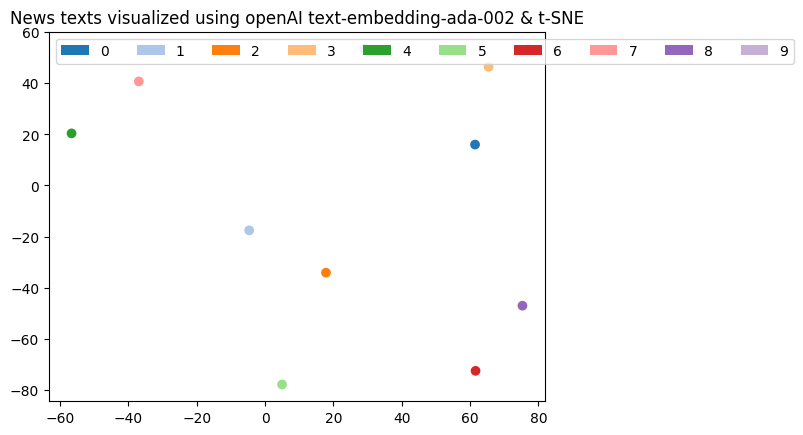

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib


tsne = TSNE(n_components=2, perplexity=5, init='random', metric='cosine')
vis_dims = tsne.fit_transform(np.array(df['ada_embedding'].tolist()))

x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

colormap = matplotlib.colormaps['tab20']
color_indices = df.index
colors = [colormap(i) for i in color_indices]
plt.scatter(x, y, c=colors, cmap=colormap)

recs = []
for i in color_indices:
    recs.append(mpatches.Rectangle((0,0), 1, 1, fc=colors[i]))
plt.legend(recs, color_indices, loc="upper left", ncol=len(color_indices))

plt.title("News texts visualized using openAI text-embedding-ada-002 & t-SNE")

[GigaChat - русскоязычная ChatGPT от Сбера](https://habr.com/ru/companies/sberbank/articles/730108/)

### Метрики расстояний

На графике выше видно, что, например, тексты 6 и 8, закодированные с помощью ada-embeddings, близки по смыслу, а текст 4 - достаточно далек. Попробуем посчитать расстояние между ними различными метриками

In [75]:
text4 = df.iloc[4, 0]
text6 = df.iloc[6, 0]
text8 = df.iloc[8, 0]
text4[:200], text6[:200], text8[:200]

('<p><strong></strong></p>\n<p><strong>москва, 31 янв - риа новости.</strong> немецкий теннисист михаэль беррер стал победителем турнира серии "челленджер" в хайльбронне (германия), призовой фонд которог',
 '<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong> генеральный секретарь оон пан ги мун заявил в воскресенье, что уверен в способности греко-кипрской и тур',
 '<p><strong></strong></p>\n<p><strong>афины, 31 янв - риа новости, алексей богдановский.</strong> генеральный секретарь оон пан ги мун прибыл в воскресенье с трехдневным визитом на кипр, чтобы помочь ме')

In [76]:
text4_emb = np.array(df.iloc[4, 2])
text6_emb = np.array(df.iloc[6, 2])
text8_emb = np.array(df.iloc[8, 2])

In [77]:
text4_emb.shape, text6_emb.shape, text8_emb.shape

((1536,), (1536,), (1536,))

#### Евклидово расстояние
![](https://machinelearningmastery.ru/img/0-33437-552071.png)

In [78]:
from sklearn.metrics.pairwise import euclidean_distances

eucl_dist_6_8 = euclidean_distances(text6_emb.reshape(1, -1), text8_emb.reshape(1, -1))
eucl_dist_4_6 = euclidean_distances(text4_emb.reshape(1, -1), text6_emb.reshape(1, -1))
eucl_dist_6_8, eucl_dist_4_6

(array([[0.28041801]]), array([[0.61741803]]))

#### Расстояние Манхэттена
Оно же L1, расстояние городских кварталов, манхэттенское расстояние, расстояние такси, метрика прямоугольного города
![](https://machinelearningmastery.ru/img/0-29997-720287.png)
![](https://thepresentation.ru/img/tmb/4/317545/7307f228e2dfcc39bf4ed5568b1e33e6-800x.jpg)

In [79]:
from sklearn.metrics.pairwise import manhattan_distances

manh_dist_6_8 = manhattan_distances(text6_emb.reshape(1, -1), text8_emb.reshape(1, -1))
manh_dist_4_6 = manhattan_distances(text4_emb.reshape(1, -1), text6_emb.reshape(1, -1))
manh_dist_6_8, manh_dist_4_6

(array([[8.73932214]]), array([[19.14623576]]))

#### Расстояние Чебышева (метрика шахматной доски)
Расстояние Чебышёва известно ещё как расстояние шахматной доски. Чтобы понять принцип такой метрики, нужно представить короля на шахматной доске — он может ходить во всех направлениях: вперёд, назад, влево, вправо и по диагонали.

![](https://media.tproger.ru/uploads/2019/12/3vars-720x265.png)

Ещё эти оба расстояния отличаются от Евклидового расстояния тем, что у Евклидового движение по диагонали рассчитывается по теореме Пифагора.

Вот ещё один пример представления расстояния Чебышёва. Допустим, у вас есть дрон с двумя независимыми моторами: первый мотор тянет дрон вперёд, второй — в сторону. Оба мотора могут работать одновременно и равномерно на максимуме своей мощности. Поэтому дрон может передвинуться на одну клетку по диагонали так же быстро, как по горизонтали или вертикали.

In [81]:
from scipy.spatial.distance import chebyshev

cheb_dist_6_8 = chebyshev(text6_emb, text8_emb)
cheb_dist_4_6 = chebyshev(text4_emb, text6_emb)
cheb_dist_6_8, cheb_dist_4_6

(0.026902196928858757, 0.05148343741893768)

#### Косинусное расстояние

In [ ]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

cos_dist_6_8 = cosine_distances(text6_emb.reshape(1, -1), text8_emb.reshape(1, -1))
cos_dist_4_6 = cosine_distances(text4_emb.reshape(1, -1), text6_emb.reshape(1, -1))

cos_sim_6_8 = cosine_similarity(text6_emb.reshape(1, -1), text8_emb.reshape(1, -1))
cos_sim_4_6 = cosine_similarity(text4_emb.reshape(1, -1), text6_emb.reshape(1, -1))

In [ ]:
cos_dist_6_8, cos_sim_6_8

(array([[0.03931713]]), array([[0.96068287]]))

In [ ]:
cos_dist_4_6, cos_sim_4_6

(array([[0.19060251]]), array([[0.80939749]]))

#### Расстояние Хэмминга

Расстояние Хэмминга (кодовое расстояние) — число позиций, в которых соответствующие символы двух слов одинаковой длины различны. В более общем случае расстояние Хэмминга применяется *для строк одинаковой длины* любых q-ичных алфавитов и служит метрикой различия (функцией, определяющей расстояние в метрическом пространстве) объектов одинаковой размерности.

In [91]:
from scipy.spatial.distance import hamming

print(hamming([0, 0, 0], [0, 0, 0]))
print(hamming([1, 0, 0], [0, 1, 0]))
print(hamming([1, 0, 0], [1, 1, 0]))
print(hamming([1, 0, 0], [2, 0, 0]))
print(hamming([1, 0, 0], [3, 0, 0]))
print(hamming([1, 1, 1], [0, 0, 0]))
print(hamming([1, 1, 1], [0, 0, 0]))

0.0
0.6666666666666666
0.3333333333333333
0.3333333333333333
0.3333333333333333
1.0
1.0


In [93]:
hamm_dist_6_8 = hamming(text6_emb, text8_emb)  # это бессмысленно
hamm_dist_4_6 = hamming(text4_emb, text6_emb)  # это бессмысленно
hamm_dist_6_8, hamm_dist_4_6

(1.0, 1.0)

#### Расстояние Жаккара

Индекс сходства Жаккара рассчитывается как:

$$ Jacc(A, B) = \frac{|A∩B|}{|А∪В|} $$

Если два набора данных имеют одни и те же элементы, их индекс сходства Жаккара будет равен 1. И наоборот, если у них нет общих элементов, их сходство будет равно 0.

In [94]:
from scipy.spatial.distance import jaccard

print(jaccard([0, 0, 0], [0, 0, 0]))
print(jaccard([1, 0, 0], [0, 1, 0]))
print(jaccard([1, 0, 0], [1, 1, 0]))
print(jaccard([1, 0, 0], [2, 0, 0]))
print(jaccard([1, 0, 0], [3, 0, 0]))
print(jaccard([1, 1, 1], [0, 0, 0]))
print(jaccard([1, 1, 1], [0, 0, 0]))

0
1.0
0.5
1.0
1.0
1.0
1.0


In [83]:
jac_dist_6_8 = jaccard(text6_emb, text8_emb)
jac_dist_4_6 = jaccard(text4_emb, text6_emb)
jac_dist_6_8, jac_dist_4_6

(1.0, 1.0)

# Домашнее задание

Провести кластеризацию новостей. 

Для этого понадобится:
  1. Провести предобработку текстов, удалив стоп-слова и преобразовав слова в леммы. (*в реальных задачах также необходимо проводить морфологический анализ и частеречную разметку*)
  2. Вычислить показатели TF-IDF для определения слов, формирующих уникальность каждого текста, на униграммах (*дополнительная задача: на биграммах*).
  3. Используя вектора TF-IDF для каждого документа, полученные в ходе п. 2, выбрать алгоритм и провести кластеризацию текстов (обратите внимание на метрику расстояния! подсказка: лучше использовать косинусное).
  4. Отобразить результат на двумерной плоскости (обратите внимание на метрику расстояния!).
  5. Для каждого кластера определить самые часто встречаемые слова (можно использовать `CountVectorizer`) и нарисовать соответствующее облако слов. Это даст нам приблизительное понимание тем, на которые разбилось множество текстов.
  6. Кластеризовать тексты, используя вложения, полученные с помощью OpenAI ada-embeddings (датасет с этими вложениями уже сохранен и лежит рядом с этим ноутбуком). Насколько отличается подход, использующий текстовые вложения, от подхода с векторами TF-IDF? Что работает лучше?
  7. На множестве преобразованных после п. 1. текстов обучить word2vec-модель (подумайте, какие гиперпараметры были бы оптимальными!)
  8. С помощью обученной модели определить 10 самых близких слов для заданного слова (любого приличного).
  * *Дополнительная задача:* используя косинусную и евклидову метрики расстояния, рассчитать внутрикластерное и межкластерное расстояния между текстами. Сравнить результаты.